In [1]:
!pip install fastai

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [11]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [12]:
!ls -l /root/.fastai/data/oxford-iiit-pet/images/ | head -n 10

total 792656
-rwxr-xr-x 1 1000 1000  126923 Jun 18  2012 Abyssinian_100.jpg
-rw-r--r-- 1 1000 1000 1351002 Jun 18  2012 Abyssinian_100.mat
-rwxr-xr-x 1 1000 1000   49023 Jun 18  2012 Abyssinian_101.jpg
-rw-r--r-- 1 1000 1000  956090 Jun 18  2012 Abyssinian_101.mat
-rwxr-xr-x 1 1000 1000  165505 Jun 18  2012 Abyssinian_102.jpg
-rw-r--r-- 1 1000 1000 1611487 Jun 18  2012 Abyssinian_102.mat
-rwxr-xr-x 1 1000 1000  132937 Jun 18  2012 Abyssinian_103.jpg
-rwxr-xr-x 1 1000 1000   34907 Jun 18  2012 Abyssinian_104.jpg
-rwxr-xr-x 1 1000 1000  141823 Jun 18  2012 Abyssinian_105.jpg


In [13]:
files = get_image_files(path)
len(files)

7390

In [17]:
def is_cat(x):
  #print(x)
  return x[0].isupper()


In [18]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))


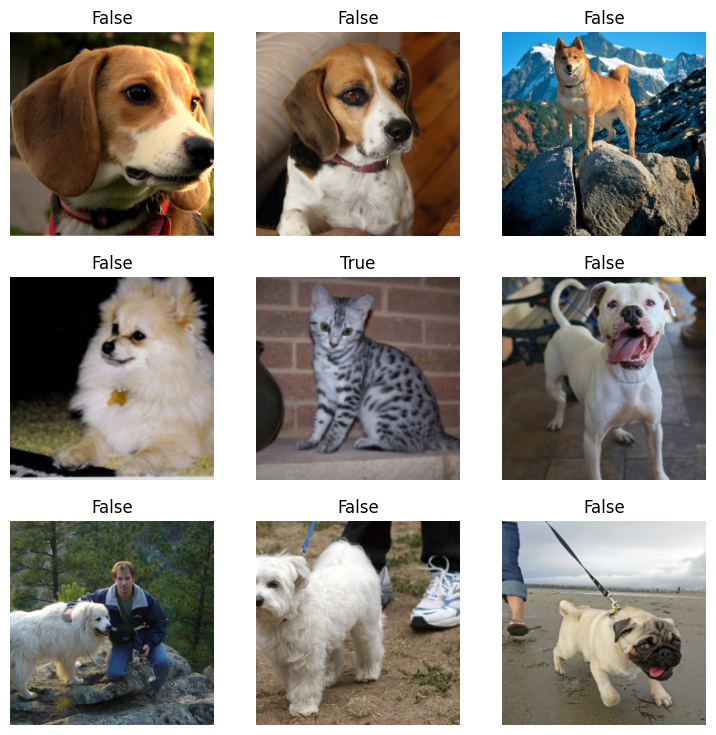

In [22]:
dls.show_batch()

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [24]:
learn.fine_tune(2)

In [ ]:
#learn.fine_tune(5)

In [25]:
type(learn)

fastai.learner.Learner

In [26]:
learn.predict(files[0])

('True', tensor(1), tensor([1.8094e-11, 1.0000e+00]))

In [29]:
type(files[0]), files[0]


(pathlib.PosixPath,
 Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_89.jpg'))

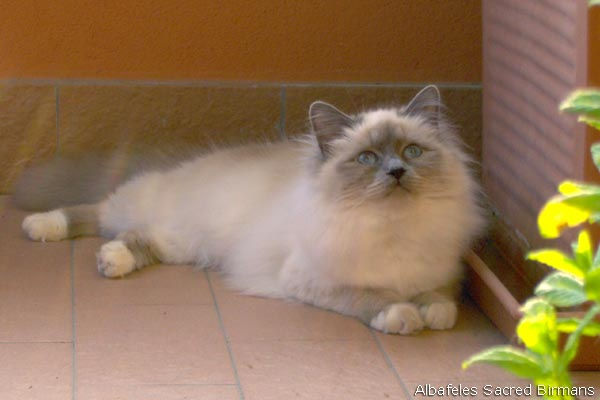

In [35]:
from PIL import Image
im = Image.open(files[5])
im


In [36]:
learn.predict(files[5])

('True', tensor(1), tensor([2.9764e-09, 1.0000e+00]))

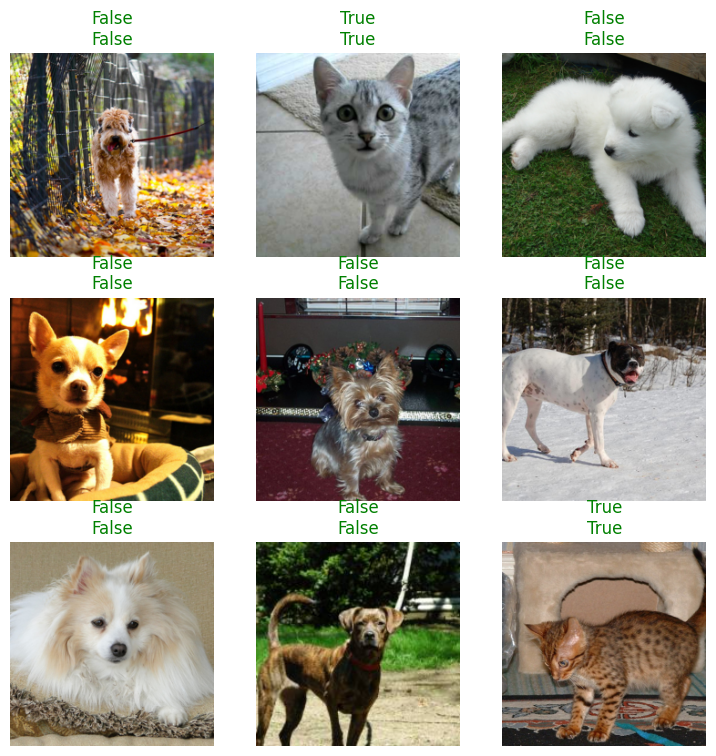

In [37]:
learn.show_results()


```
cnn_learner(
    data:DataBunch, # 传入的数据包
    base_arch:Callable, # 要进行Finetune的主干网络
    cut:Union[int, Callable]=None, # 在哪一层切割网络
    pretrained:bool=True, # 是否使用预训练的模型
    lin_ftrs:Optional[Collection[int]]=None, # 添加的头部子网络中的线性层的特征数目。
    ps:Floats=0.5, # 添加的头部子网络中的dropout层的丢弃概率
    custom_head:Optional[Module]=None, # 自定义的头部子网络
    split_on:Union[Callable, Collection[ModuleList], NoneType]=None,
    bn_final:bool=False, # 在分类之前是否添加Batch Normalization层
    init='kaiming_normal_', # 添加的头部子网络的初始化方法
    concat_pool:bool=True,
    **kwargs:Any) → Learner
```




In [ ]:
# let's try another arch.
dls2 = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls2, resnet50, metrics=error_rate)
learn.fine_tune(5)

In [ ]:
# let's try another arch.
dls3 = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls3, resnet101, metrics=error_rate)
learn.fine_tune(5)

In [ ]:
path= untar_data(URLs.CAMVID_TINY)

# Train car images.

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)

)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 211MB/s]


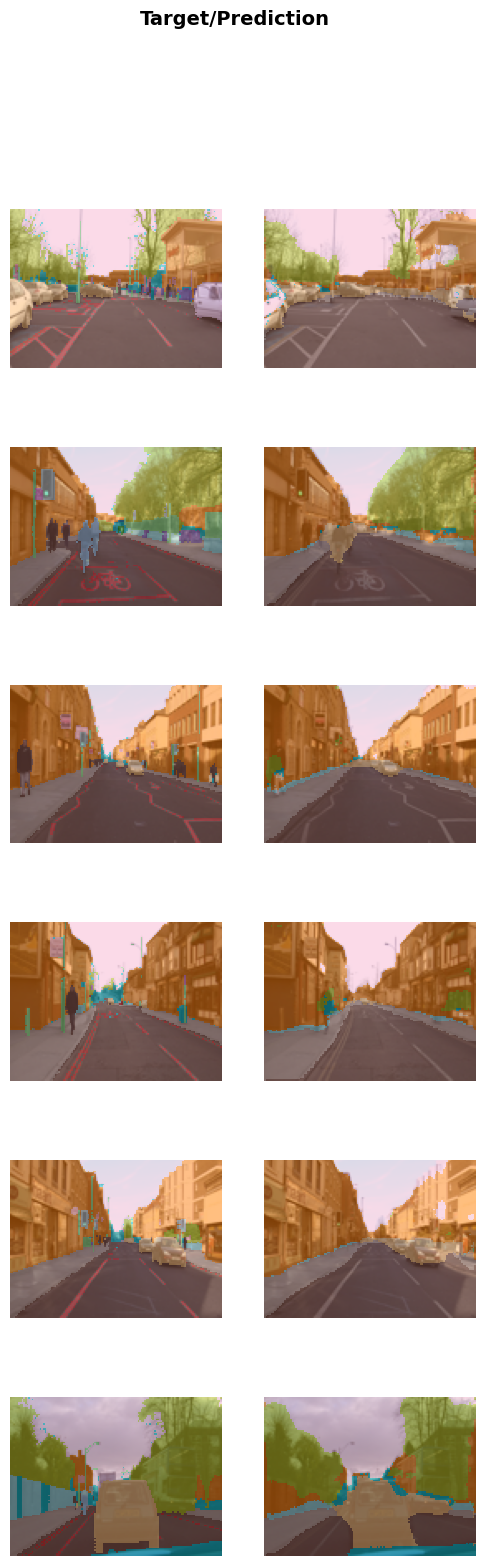

In [ ]:
learn.show_results(max_n=6)

In [ ]:
# NLP


In [ ]:
from fastai.text.all import *


In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [ ]:
rn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [ ]:
learn.fine_tune(4, 1e-2)

# Multi-label classification

In [39]:
path = untar_data(URLs.PASCAL_2007)

In [40]:
path.ls()


(#8) [Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/test.csv')]

In [41]:
!head -10 /root/.fastai/data/pascal_2007/train.csv

fname,labels,is_valid
000005.jpg,chair,True
000007.jpg,car,True
000009.jpg,horse person,True
000012.jpg,car,False
000016.jpg,bicycle,True
000017.jpg,person horse,False
000019.jpg,cat,True
000020.jpg,car,True
000021.jpg,dog person,True


In [42]:
!head -10 /root/.fastai/data/pascal_2007/valid.json

{"images":[{"file_name":"000005.jpg","height":375,"width":500,"id":5},{"file_name":"000007.jpg","height":333,"width":500,"id":7},{"file_name":"000009.jpg","height":375,"width":500,"id":9},{"file_name":"000016.jpg","height":500,"width":334,"id":16},{"file_name":"000019.jpg","height":375,"width":500,"id":19},{"file_name":"000020.jpg","height":500,"width":375,"id":20},{"file_name":"000021.jpg","height":500,"width":336,"id":21},{"file_name":"000024.jpg","height":335,"width":500,"id":24},{"file_name":"000030.jpg","height":375,"width":500,"id":30},{"file_name":"000039.jpg","height":375,"width":500,"id":39},{"file_name":"000041.jpg","height":333,"width":500,"id":41},{"file_name":"000046.jpg","height":500,"width":332,"id":46},{"file_name":"000050.jpg","height":375,"width":500,"id":50},{"file_name":"000051.jpg","height":375,"width":500,"id":51},{"file_name":"000052.jpg","height":333,"width":500,"id":52},{"file_name":"000060.jpg","height":334,"width":500,"id":60},{"file_name":"000063.jpg","heigh

In [43]:
df = pd.read_csv(path/'train.csv')

In [44]:
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [45]:
dls = ImageDataLoaders.from_df(df, path, folder='train',
                               valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

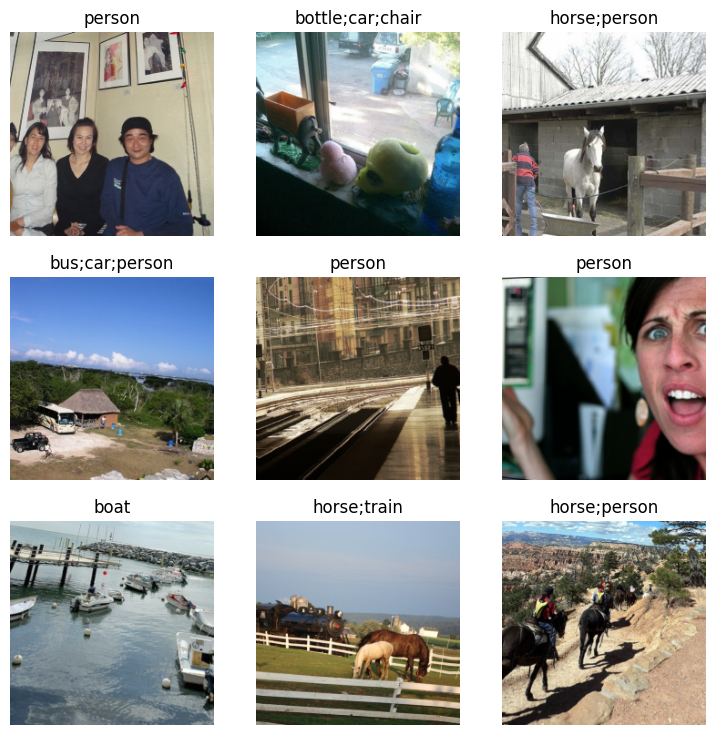

In [48]:
dls.show_batch()

In [50]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name='F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'


In [51]:
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi,thresh=0.5), f1_macro, f1_samples])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 157MB/s]


SuggestedLRs(valley=0.0008317637839354575)

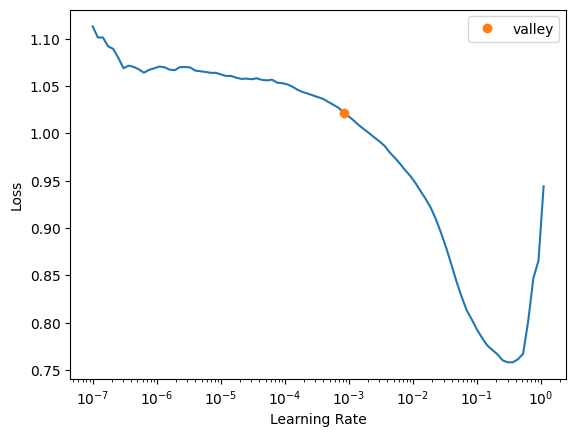

In [52]:
learn.lr_find()

In [53]:
learn.fine_tune(2,3e-2)

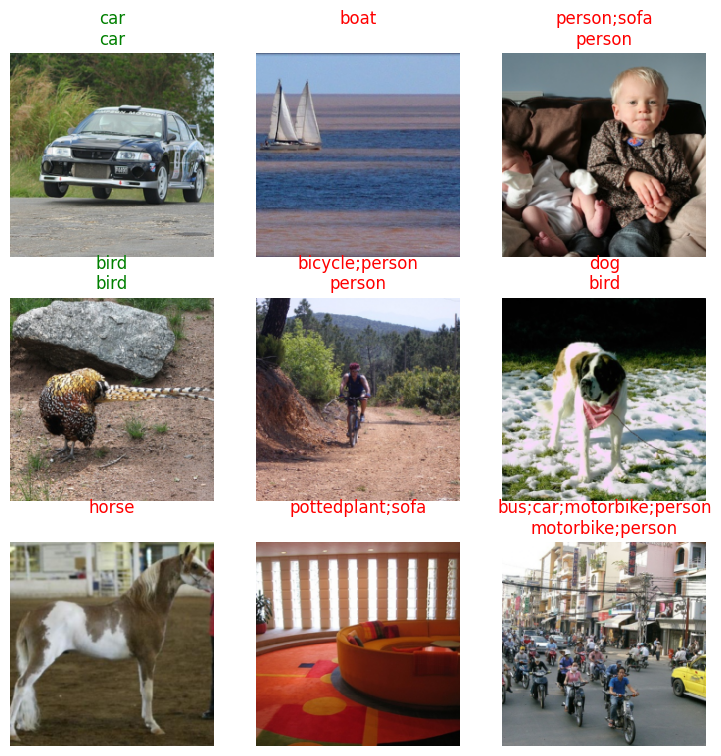

In [58]:
learn.show_results()

# Segmentation

In [59]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images')]

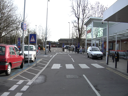

In [65]:
Image.open(get_files(path/'images')[5])

In [66]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [67]:
fnames = get_image_files(path/'images')
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_08057.png')

In [68]:
(path/'labels').ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0001TP_007860_P.png')

In [75]:
!ls -l /root/.fastai/data/camvid_tiny/images/0001TP_007860*


-rw-rw-r-- 1 1000 1000 19598 Oct 30  2018 /root/.fastai/data/camvid_tiny/images/0001TP_007860.png


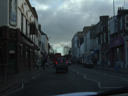

In [76]:
Image.open('/root/.fastai/data/camvid_tiny/images/0001TP_007860.png')

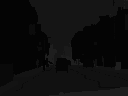

In [69]:
Image.open((path/'labels').ls()[0])

In [77]:
def label_func(fn):
  return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [78]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func, codes = codes
)

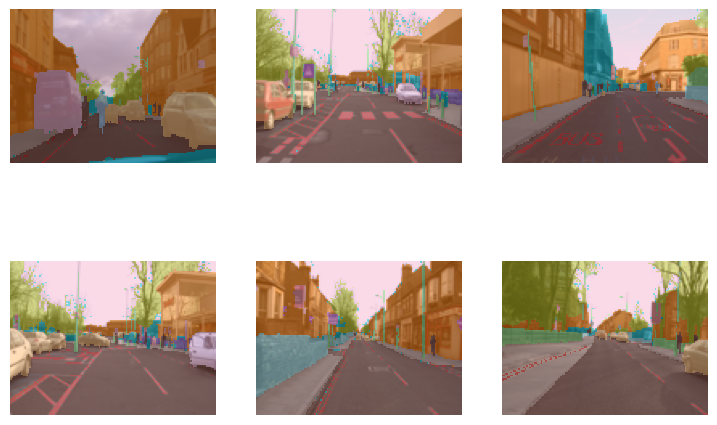

In [80]:
dls.show_batch(max_n=6)

In [81]:
learn = unet_learner(dls,resnet34)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [84]:
learn.fine_tune(50)

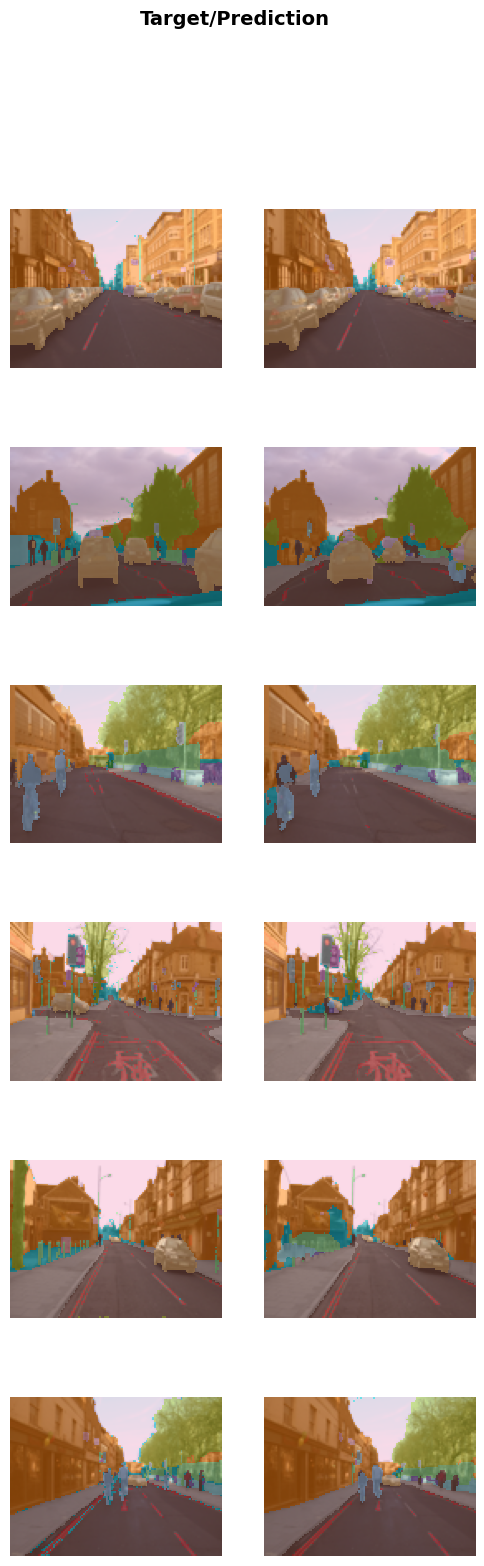

In [86]:
learn.show_results(max_n=6)

In [88]:
interp = SegmentationInterpretation.from_learner(learn)


TypeError: ignored

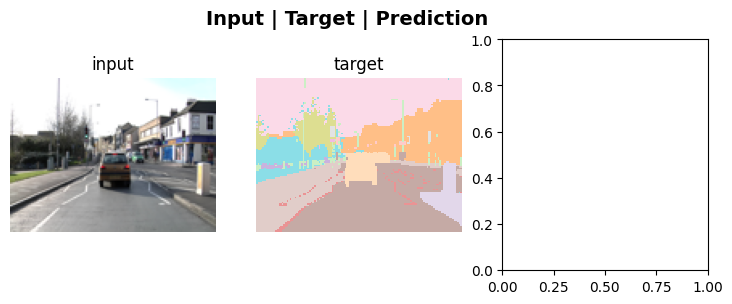

In [91]:
interp.plot_top_losses(k=1)